# < Seaborn >

***그래프 사이즈 설정***

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 4]

### ※ Seaborn 옵션  
https://seaborn.pydata.org/tutorial.html

In [ ]:
import seaborn as sns

sns.set(palette="deep") # 색상(muted, bright, deep, colorblind, dark)
sns.set(style="whitegrid") # 배경(darkgrid, whitegrid, dark, white, ticks)
sns.despine(offset=10, trim=True) 

<Figure size 360x288 with 0 Axes>

### 샘플 데이터 로드

In [ ]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
ti = sns.load_dataset("titanic")
fmri = sns.load_dataset("fmri")
flights = sns.load_dataset("flights")

## 1. 실수형 데이터  
## 1) 1차원 실수형 데이터  
### 1.1) 러그 플롯  
- 데이터 위치를 x축 위에 선분으로 나타내어 실제 데이터들의 위치를 보여준다.  
- 실수형 데이터의 위치를 파악 할 수 있음

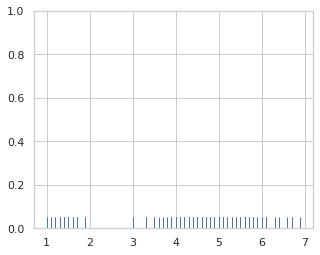

In [ ]:
sns.rugplot(iris.petal_length.values)

### 1.2) 커널 밀도  
- 히스토그램보다 부드러운 형태의 분포 곡선
- 밀도 그래프로 데이터의 형태를 파악 할 수 있음

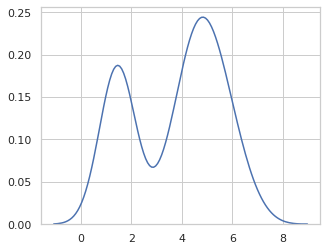

In [ ]:
sns.kdeplot(iris.petal_length.values)

### 1.3) Distplot
- 러그 + 커널 밀도

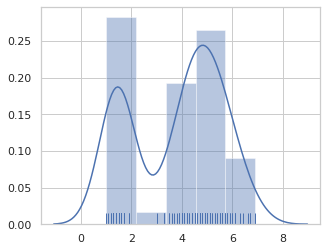

In [ ]:
sns.distplot(iris.petal_length.values, kde=True, rug=True)

### 1.4) Count Plot

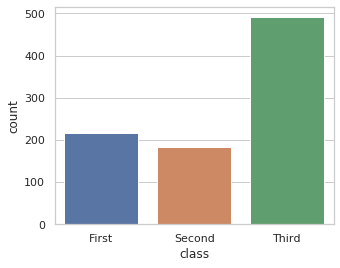

In [ ]:
sns.countplot(x="class", data=ti)

## 2) 2차원 이상 실수형 데이터  
### 2.1) 산점도
- 데이터를 점으로 퍼트려 놓은 그래프
- 변수의 분포, 상관관계를 파악 할 수 있음

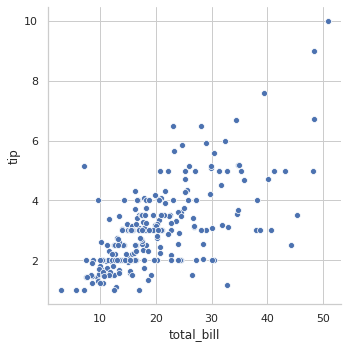

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips)

### 2.1.1) 카테고리형 데이터
- 범주형 데이터를 포함하는 산점도

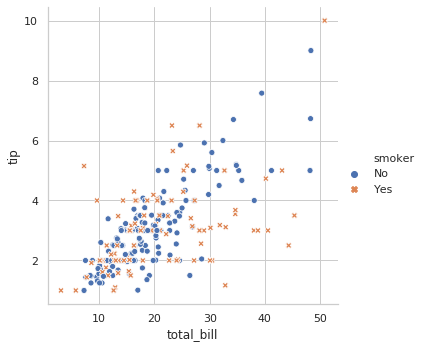

In [ ]:
# hue: 카테고리별 색상
# style: 카테고리별 모양 설정
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

### 2.1.2) 버블 플롯
- 제 3의 변수를 점의 크기로 표현

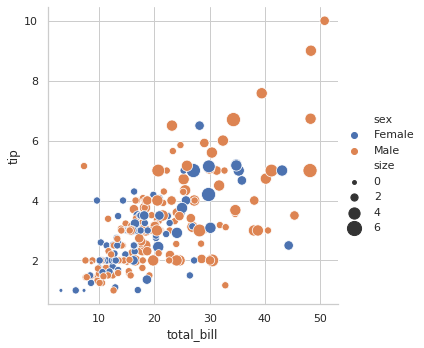

In [ ]:
# size: 실수형 카테고리
# sizes: 점 크기
sns.relplot(x="total_bill", y="tip", hue="sex", size="size", sizes=(15,200), data=tips) 

### 2.1.3) Join plot
- 산점도 + 변수 히스토그램

Text(0.5, 1.02, 'Joint Plot')

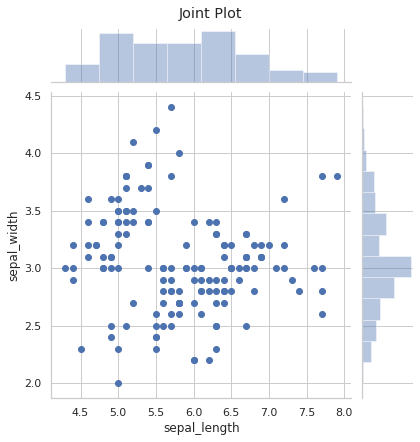

In [27]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("Joint Plot", y=1.02)

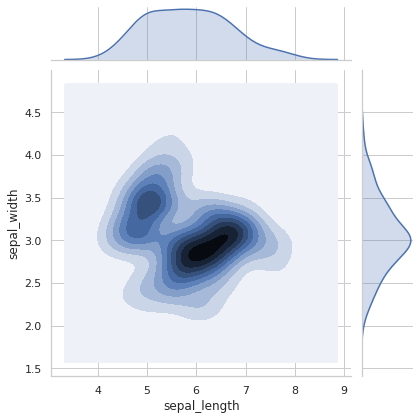

In [ ]:
# kind="kde": 커널 밀도 히스토그램
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde") 

### 2.2) Line Graph
- 데이터의 점들을 연결하여 하나의 선으로 그려놓은 그래프
- 시간 별 추세 파악에 용이함

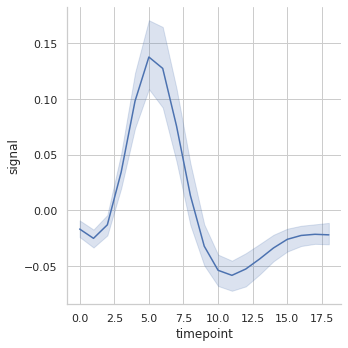

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

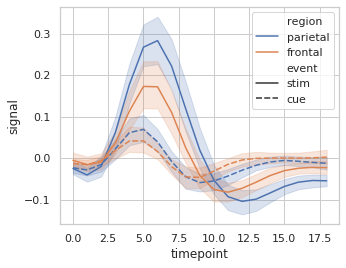

In [ ]:
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

### 2.3) 산점도 매트릭스
- 다차원 데이터의 경우 여러개의 산점도 매트릭스로 표현함
- 다차원 데이터의 분포를 한눈에 확인 할 수 있음

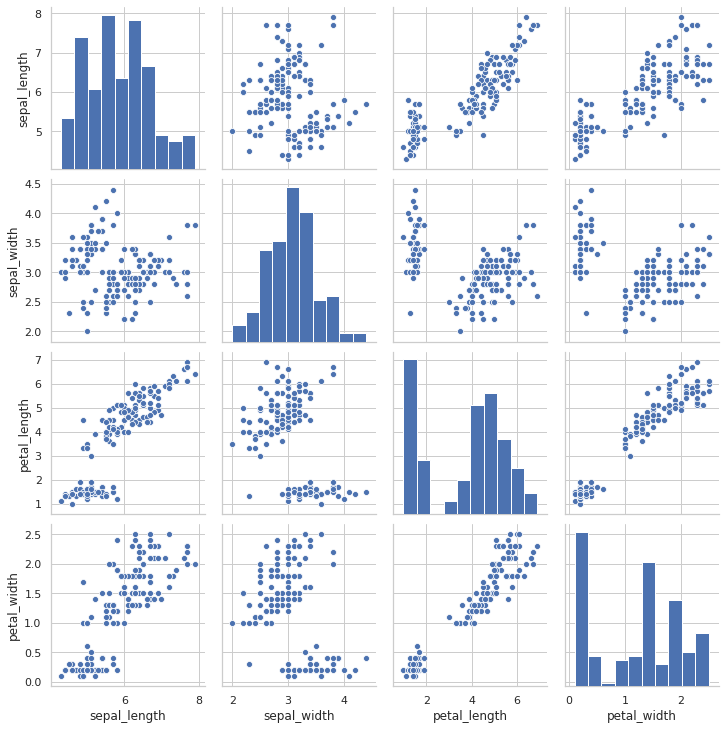

In [ ]:
sns.pairplot(iris)

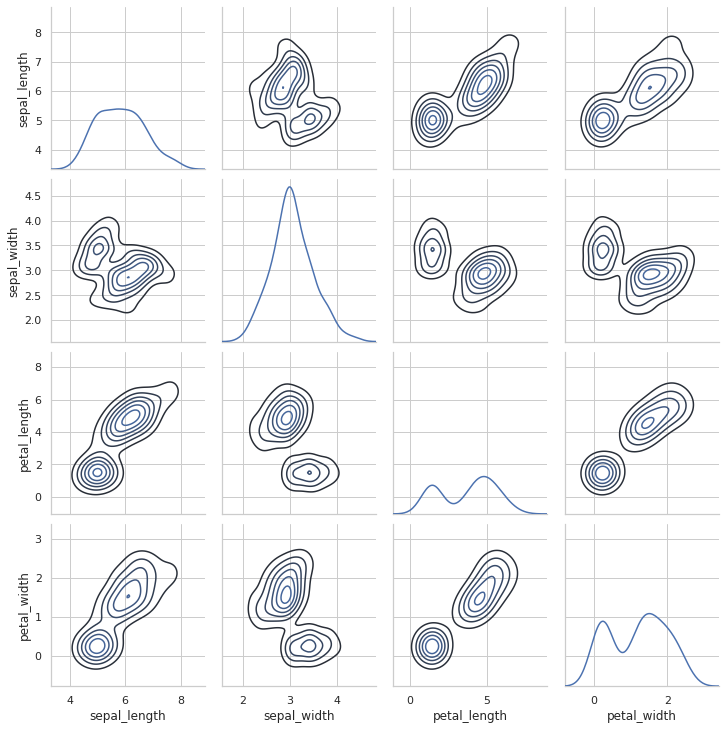

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

### 2.3.1) 카테고리형 데이터

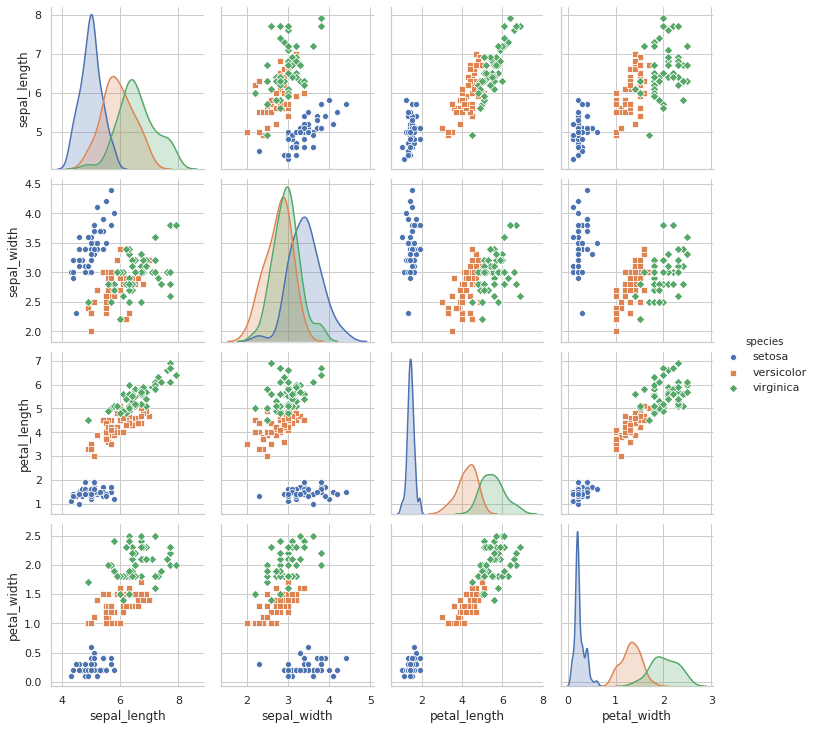

In [ ]:
# makers: 점 모양 선택
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

## 2. 2차원 카테고리 데이터
## 1) 히트맵
- 데이터가 2차원이고 모든 값이 카테고리 값이면 적용함
- 두 개의 카테고리별 수치의 크기를 한눈에 파악 할 수 있음

In [ ]:
ti_size = ti.pivot_table(index="class", columns="sex", aggfunc="size")
ti_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


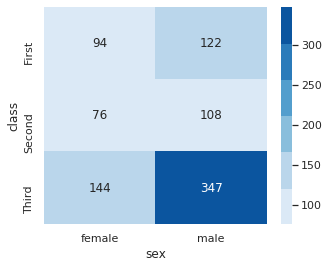

In [ ]:
# cmap:색상
sns.heatmap(ti_size, cmap= sns.color_palette("Blues"), annot=True, fmt="d")

## 3. 복합형 데이터
## 1) 2차원 이상 
### 1.1) 범주형 산점도
- 범주별로 데이터의 분포를 점으로 표현함
- 범주에 따른 분포를 파악 할 수 있음

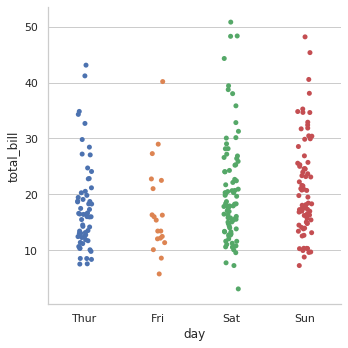

In [ ]:
sns.catplot(x="day", y="total_bill", data=tips)

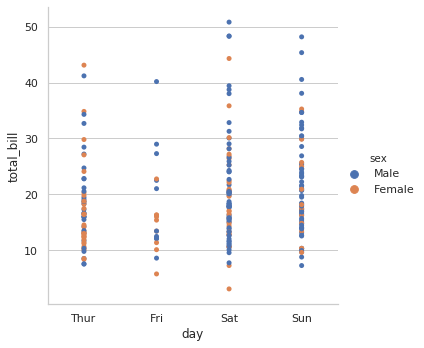

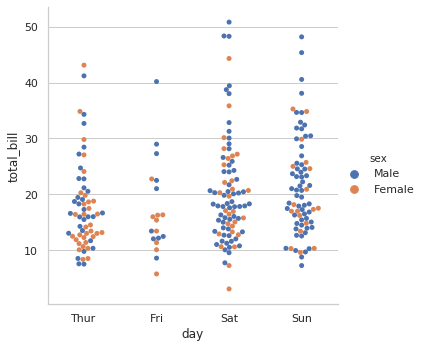

In [ ]:
# jitter:가로축상의 데이터를 바꾸어 겹치지 않도록함
sns.catplot(x="day", y="total_bill", hue="sex", jitter=False, data=tips) 
# swarm:점이 겹치지 않도록 옆으로 이동
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips) 

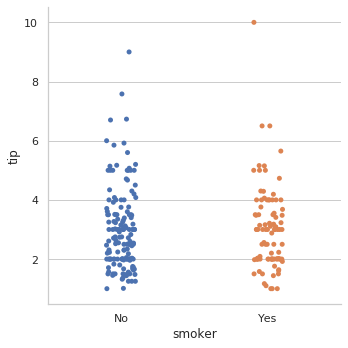

In [ ]:
sns.catplot(x="smoker", y="tip", order=["No","Yes"], data=tips)

### 1.2) 막대 그래프
- 범주별로 실수 데이터의 평균, 편차를 표현함
- 범주별로 평균, 편차를 한눈에 비교 할 수 있음

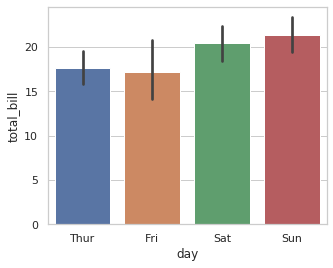

In [ ]:
sns.barplot(x="day", y="total_bill", data=tips)

### 1.2.1) Group Barplot _count

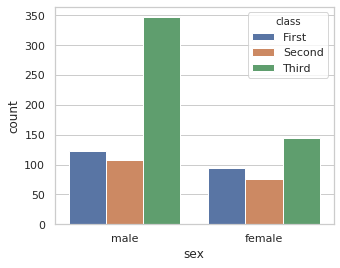

In [ ]:
# hue:카테고리별
sns.countplot(x="sex", hue="class", data=ti) 

### 1.2.2) Group Barplot

In [ ]:
import numpy as np

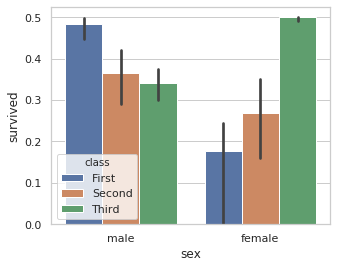

In [ ]:
# estimator:원하는 통계값
sns.barplot(x="sex", y="survived", hue="class", data=ti, estimator=np.std) 

### 1.3) Box Plot
- 범주별로 박스 플롯 시각화
- 범주별로 사분위수, 이상치를 한눈에 비교 할 수 있음

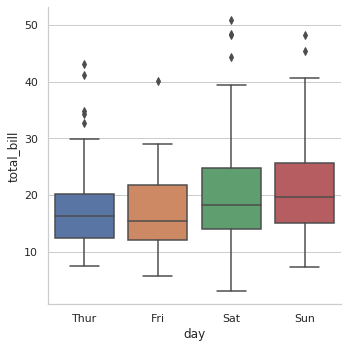

In [ ]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

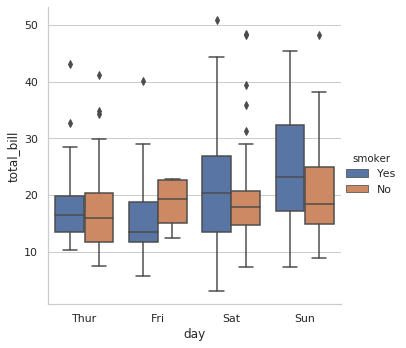

In [ ]:
sns.catplot(x="day", y="total_bill", kind="box", hue="smoker", data=tips)

### 1.4) 바이올린 플롯
- 커널 밀도 히스토그램
- 범주별로 전체 형상을 파악 할 수 있음

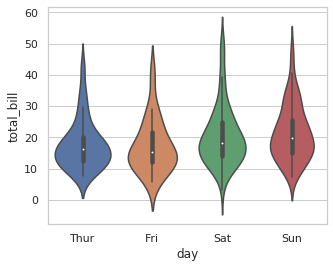

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips)

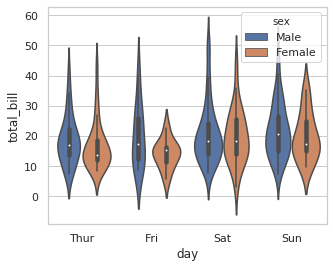

In [ ]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

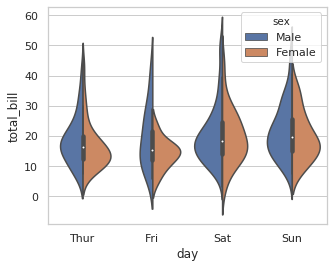

In [ ]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

## 4. 기타
## 1) 선형회귀직선
- 회귀직선으로 두 변수의 상관관계를 확인 할 수 있음

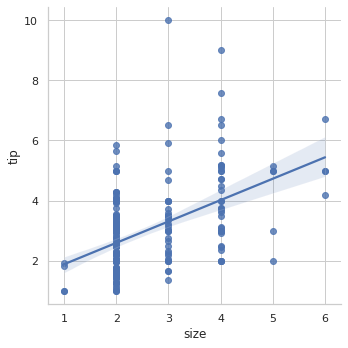

In [ ]:
sns.lmplot(x="size", y="tip", data=tips)

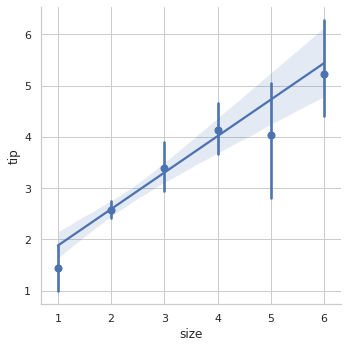

In [ ]:
# x_estimarot = np.mean:이상치 제외하고 표시
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean) 

### 1.1) 카테고리 데이터를 포함한 선형회귀직선
- 카테고리별 데이터의 분포와 선형 관계 표시

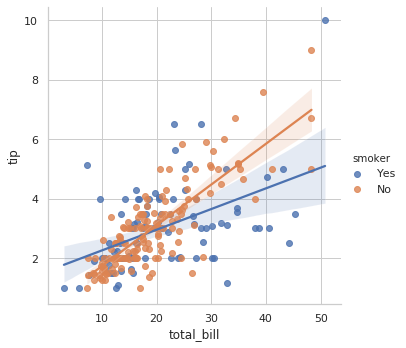

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

## 2) 차트 겹쳐 그리기
### 2.1) 박스플롯 + 산점도

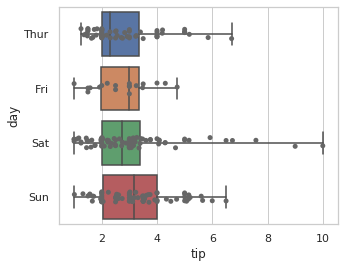

In [ ]:
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")

## 3) 패싯 그리드

In [ ]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


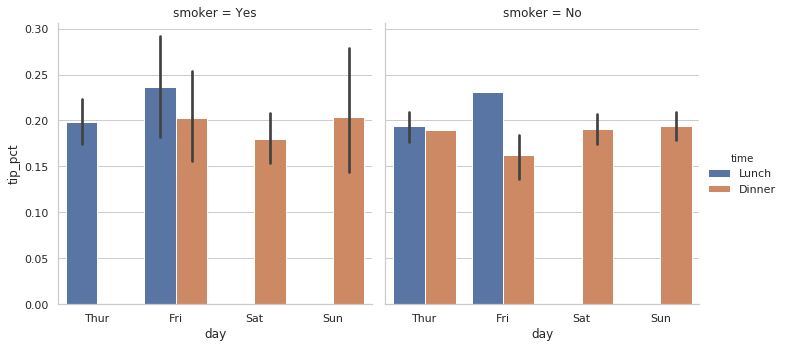

In [ ]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

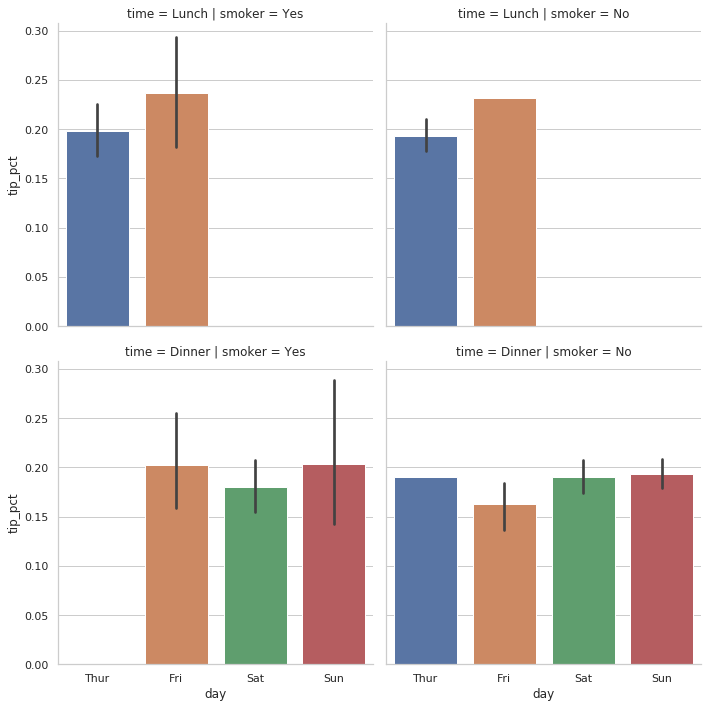

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

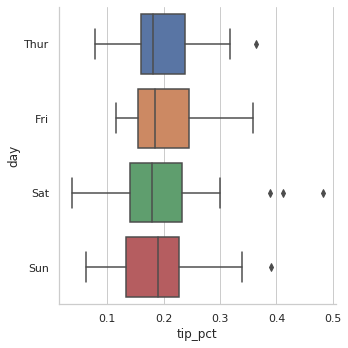

In [ ]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])